In [1]:
#ensembling
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import pandas as pd
import sys, os, glob
import imp
import seaborn as sns
sys.path.append('./src/')
import classes, common_utils,my_ensembler, feature_utils, defines, model_utils, my_bert
from sklearn.neighbors import KNeighborsClassifier
from sklearn_crfsuite import scorers, CRF
from sklearn.pipeline import Pipeline
import json
from operator import itemgetter
from sklearn_crfsuite.utils import flatten
from sklearn_crfsuite.metrics import sequence_accuracy_score
from sklearn.linear_model import LogisticRegression
import scipy
import sklearn
import scipy.stats
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
import classes
import pickle
import matplotlib.pyplot as plt
import copy
import matplotlib.pyplot as plt


In [3]:
dir_name='reparse'
seq_len=15
step=15
cv_split_name='cv_splits_10'
merged_str='scaled.binary0.50_merged'
doc_indices=np.arange(1,81)
doc_indices
test_doc_num=8
seed=42

In [4]:
dir_name='reparse'
docs_map_name = 'scaled.binary.5_stop_docs_map.json'
crf_params_name='.802_21.07_07:26_best_params.json'
ens_crf_db_name   = 'ensemble_crf_cv_db_all'
ens_lg_db_name = 'ensemble_lg_cv_db_all'
cv_crf_bert_name = 'cv_crf_bert_all'
per_par=True
seq_len=3
step=3

### Open BERT predictions

In [ ]:
i=0
splits_bert={}
for i in range(10):
    json_name="split_{}_bert_valid_dict".format(i)
    splits_bert[i]=common_utils.load_json(dir_name,json_name)

In [ ]:
data=splits_bert[i]['valid_loss']

In [ ]:
data

In [ ]:
bert_loss_df=pd.DataFrame()
for k,v in splits_bert.items():
#     print(k,v['valid_loss'])
    bert_loss_df[k]=v['valid_loss']
common_utils.save_db(bert_loss_df,dir_name,"bert.loss.per.fold",False)

In [ ]:
splits_bert[y]['valid_loss']

In [ ]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(splits_bert.keys())))

In [ ]:
for y, c in zip(splits_bert.keys(), colors):
    data=splits_bert[y]['valid_loss']
    min_x = np.argmin(data)
    min_y = np.min(data)
    plt.plot(data,marker='o',color=c)#, color='magenta', marker='o',mfc='pink' ) #plot the data
#     plt.scatter(min_x, min_y,c='r', label='minimum',zorder =1)
plt.xticks(range(0,len(data), 1)) #set the tick frequency on x-axis
# plt.legend()
plt.ylabel('Validation loss across splits') #set the label for y axis
plt.xlabel('epoch index') #set the label for x-axis
plt.title('Validation loss') #set the title of the graph
plt.show() #display the graph

### Check stories

In [ ]:
imp.reload(classes)
reloaded_dataset=pickle.load( open( os.path.join(os.getcwd(), defines.PATH_TO_DFS, dir_name,"dataset_full.p"), "rb" ) )

In [ ]:
sent_label_db = common_utils.concat_dbs(dir_name,"sent_db")

In [ ]:
imp.reload(classes)
dataset=classes.Dataset("")
dataset.copy_attr(reloaded_dataset)

In [ ]:
sent_label_db = common_utils.concat_dbs(dir_name,"sent_db")

In [ ]:
nar_db['len']=nar_db['text'].apply(lambda x: len(x))
nar_db

In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(nar_db[nar_db['text'].str.contains("טלו")])

In [ ]:
nar_db=dataset.get_nar_df()

In [ ]:
with pd.option_context('display.max_colwidth', None,'display.max_rows', None): 
    display(nar_db.query('len<300'))

In [ ]:
sent_db

### Check document statistic

In [ ]:
par_contain_nar=[]
for key,val in reloaded_dataset.doc_map.items():
    for par in var.par_list:
        if par.y == 'is_nar'
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
vars(reloaded_dataset.doc_map[1].par_list[0])

In [ ]:
sent_label_db

In [ ]:
sent_label_db

In [ ]:
np.std(par_len),np.std(sent_len)

In [ ]:
np.median(par_len),np.median(sent_len)

In [ ]:
for key,val in reloaded_dataset.doc_map.items():
    par_len.append(len(val.par_list))
    sent_len.append(len(val.sent_list))

In [ ]:
vars(reloaded_dataset.doc_map[1].sent_list[13])

### Check paragraph statistic

In [ ]:
reloaded_dataset.doc_map[1].par_list

In [ ]:
imp.reload(classes)
new_dataset=classes.Dataset(reloaded_dataset.path)

In [ ]:
for k,doc in reloaded_dataset.doc_map.items():
    new_dataset.doc_map[k]={}
    new_dataset.doc_map[k] = classes.Document(k,new_dataset.path)
    new_dataset.doc_map[k].__dict__ = doc.__dict__

In [ ]:
new_dataset.doc_map[1]

In [ ]:
new_dataset.pack_sent_per_paragraph()

In [ ]:
par_stat_db=pd.DataFrame()

for k,doc in new_dataset.doc_map.items():
    for j,par in doc.par_map.items():
        par_stat_db.iloc[k,'doc_idx']=k
        

### Inspect BERT performance

In [ ]:
cv_db_bert=common_utils.load_db(dir_name,"cv_bert_all")

In [ ]:
bert_scores, bert_dict = model_utils.get_report_from_splits(cv_db_bert,"bert")

In [ ]:
bert_dict

In [ ]:
colors=['r','b']
linestyle=['dashed','solid']
f1={}
f1['1']=[]
f1['0']=[]
for label in f1.keys():
    for key,val in bert_dict.items():
        f1[label].append(val[label]['f1-score'])

In [ ]:
avg={}
avg['1']={}
avg['0']={}
avg['weighted avg']={}
for label in avg.keys():
    avg[label]={}
    avg[label]['recall']=[]
    avg[label]['prec']=[]
    avg[label]['f1']=[]

    for key,val in bert_dict.items():
        avg[label]['f1'].append(val[label]['f1-score'])
        avg[label]['recall'].append(val[label]['recall'])
        avg[label]['prec'].append(val[label]['precision'])

In [ ]:
for label,metrics in avg.items():
    for metric,value in metrics.items():
        print("{:>15} {:>10} {:.3f}".format(label,metric,np.mean(value)))
    

In [ ]:
from matplotlib import pyplot as plt
for y, c, st in zip(f1.keys(), colors,linestyle):
    data=f1[y]
    min_x = np.argmin(data)
    min_y = np.min(data)
    plt.plot(data,marker='o',color=c,linestyle=st,label=y)#, color='magenta', marker='o',mfc='pink' ) #plot the data
#     plt.scatter(min_x, min_y,c='r', label='minimum',zorder =1)
plt.xticks(range(0,len(data), 1)) #set the tick frequency on x-axis
plt.legend()
plt.ylabel('f-1 score') #set the label for y axis
plt.xlabel('fold index') #set the label for x-axis
plt.title('f-1 score per label') #set the title of the graph
plt.show() #display the graph

In [ ]:
f1

In [ ]:
imp.reload(classes)
rprt=classes.MyReport()
avg=rprt.get_avg_scores(bert_dict,labels=['0','1'])
for l in ['0','1']:
    print("{} {}".format(l,avg[l]['avg']))

In [ ]:
avg

In [ ]:
np.argmin(avg['1']['f1']),np.min(avg['1']['f1'])

In [ ]:
np.argmax(avg['1']['f1']),np.max(avg['1']['f1'])

In [ ]:
(np.max(avg['1']['f1'])-np.min(avg['1']['f1']))/np.min(avg['1']['f1'])

In [ ]:
np.std(avg['1']['f1']),np.std(avg['0']['f1'])

In [ ]:
colors=['r','b']
linestyle=['dashed','solid']
f1={}
f1['1']=[]
f1['0']=[]
for label in f1.keys():
    for key,val in bert_dict.items():
        f1[label].append(val[label]['f1-score'])

In [ ]:
from matplotlib import pyplot as plt
for y, c, st in zip(f1.keys(), colors,linestyle):
    data=f1[y]
    min_x = np.argmin(data)
    min_y = np.min(data)
    plt.plot(data,marker='o',color=c,linestyle=st,label=y)#, color='magenta', marker='o',mfc='pink' ) #plot the data
#     plt.scatter(min_x, min_y,c='r', label='minimum',zorder =1)
plt.xticks(range(0,len(data), 1)) #set the tick frequency on x-axis
plt.legend()
plt.ylabel('f-1 score') #set the label for y axis
plt.xlabel('fold index') #set the label for x-axis
plt.title('f-1 score per label') #set the title of the graph
plt.show() #display the graph

### Inspect CRF performance

In [ ]:
cv_db_crf=common_utils.load_db(dir_name,"cv_crf_best_params.78")

In [ ]:
cv_db_crf

In [ ]:
crf_scores, crf_dict = model_utils.get_report_from_splits(cv_db_crf,"crf")

In [ ]:
imp.reload(classes)
rprt=classes.MyReport()
labels=['not_nar','is_nar','weighted avg']
avg=rprt.get_avg_scores(crf_dict,labels=labels)
for l in labels:
    print("\n{:>15}".format(l),end =' ')
    for k,v in avg[l]['avg'].items():
#         print(k)
        print("{:>8} {:>8.3f}".format(k,v),end=' ')

In [25]:
imp.reload(common_utils)
crf_best_params=common_utils.load_pickle("","crf.rs.params.793")
crf_best_params

{'min_freq': 5, 'c2': 0.0071, 'c1': 0.459, 'algorithm': 'lbfgs'}

In [ ]:
avg['weighted avg']

In [ ]:
crf_dict

In [ ]:
np.argmin(avg[labels[1]]['f1']),np.min(avg[labels[1]]['f1'])

In [ ]:
np.argmax(avg[labels[1]]['f1']),np.max(avg[labels[1]]['f1'])

In [ ]:
f1_crf

In [ ]:
from matplotlib import pyplot as plt
for y, c, st in zip(f1_crf.keys(), colors,linestyle):
    data=f1_crf[y]
    min_x = np.argmin(data)
    min_y = np.min(data)
    plt.plot(data,marker='o',color=c,linestyle=st,label=y)#, color='magenta', marker='o',mfc='pink' ) #plot the data
#     plt.scatter(min_x, min_y,c='r', label='minimum',zorder =1)
plt.xticks(range(0,len(data), 1)) #set the tick frequency on x-axis
plt.legend()
plt.ylabel('f-1 score') #set the label for y axis
plt.xlabel('fold index') #set the label for x-axis
plt.title('f-1 score per label') #set the title of the graph
plt.show() #display the graph

In [ ]:
ensemble_cv_db

### Load original splits

In [ ]:
cv_splits_loaded=common_utils.load_json(dir_name,"cv_splits_10")
cv_splits_loaded

In [ ]:
for k,v in cv_splits_loaded.items():
    if (4 in v['test'] and 76 in v['test']):
        print ('both in test',k)
    if (4 in v['train'] and 76 in v['train']):
        print ('both in train',k)

### Merge new CRF and old BERT

In [ ]:
cv_db_crf=cv_db_crf.assign(sent_idx=cv_db_crf.groupby(['crf_group']).cumcount())
cv_db_bert=cv_db_bert.assign(sent_idx=cv_db_bert.groupby(['bert_group']).cumcount())

In [ ]:
merged_cv_db=pd.merge(cv_db_crf,cv_db_bert,left_on=['crf_group','sent_idx'],right_on=['bert_group','sent_idx'],validate='one_to_one')


In [ ]:
cv_db_crf

In [ ]:
ensemble_res=pd.DataFrame()
ensemble_cv_db=model_utils.prepared_cross_validate_ensemble(LogisticRegression(random_state=0),ensemble_res,merged_cv_db,cv_splits_loaded)

In [ ]:
cv_db_crfx

In [ ]:
ens_scores, ens_dict = model_utils.get_report_from_splits(ensemble_cv_db,"ens")

In [ ]:
xxens_scores, ens_dict = model_utils.get_report_from_splits(merged_cv_db,"ens")

In [ ]:
imp.reload(classes)
rprt=classes.MyReport()
labels=['0','1']
labels.append('weighted avg')
avg=rprt.get_avg_scores(ens_dict,labels=labels)
for l in labels:
    print("\n{:>15}".format(l),end =' ')
    for k,v in avg[l]['avg'].items():
#         print(k)
        print("{:>8} {:>8.3f}".format(k,v),end=' ')

In [ ]:
ensemble_cv_db

### Retrive the strongest features from crf

In [20]:
dataset=common_utils.load_pickle(dir_name,'dataset_new.76')

In [ ]:
imp.reload(model_utils)


In [23]:
imp.reload(model_utils)
imp.reload(model_utils)
my_crf_1 = model_utils.CrfClassifier(crf_model=CRF(
                max_iterations=100,
                all_possible_transitions=True))

CrfClassifier>>>>>>init() called


In [24]:
my_crf_1.fit(dataset.get_x([1,2],'15_15'),dataset.get_y([1,2],'15_15'))
my_crf_1.predict(dataset.get_y([3,4],'15_15'))

CrfClassifier>>>>>>>predict() called


['is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',

In [20]:
my_crf_2 = model_utils.CrfClassifier(crf_model=CRF(
                max_iterations=100,
                all_possible_transitions=True))
my_crf_2.fit(dataset.get_x([3,4],'15_15'),dataset.get_y([3,4],'15_15'))
my_crf_2.predict(dataset.get_y([1,2],'15_15'))

CrfClassifier>>>>>>init() called
CrfClassifier>>>>>>>predict() called


['is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',
 'is_nar',

In [21]:
features_1=model_utils.get_estimator_features(my_crf_1.crf_model,**dataset.tf_params)
features_2=model_utils.get_estimator_features(my_crf_2.crf_model,**dataset.tf_params)


In [22]:
display(features_1.head()),display(features_2.head())

,weight,label,attr,string
0,0.740766,is_nar,is_client,
1,0.359704,not_nar,+1:is_client,
2,0.351215,is_nar,+1:sent_pos_in_par,
3,0.346278,not_nar,-3:POSTAG_NN,
4,0.335047,is_nar,tfidf_lemma_221,אני


,weight,label,attr,string
0,0.700640,is_nar,is_client,
1,0.358428,is_nar,f_per_1,
2,0.288380,is_nar,-1:POSTAG_NN,
3,0.271590,not_nar,tfidf_lemma_2360,עבודה
4,0.270802,is_nar,f_tense_PAST,


(None, None)

In [34]:
features_1.shape[0],features_2.shape[0]

(21812, 18694)

In [35]:
featules_all = features_1.merge(features_2[['label','attr','weight']],on=['label','attr'],suffixes=(None,"_{}".format(1)),how='outer',copy=False,validate='one_to_one')
featules_all

,weight,label,attr,string,weight_1
0,0.740766,is_nar,is_client,,0.700640
1,0.359704,not_nar,+1:is_client,,-0.152312
2,0.351215,is_nar,+1:sent_pos_in_par,,-0.053314
3,0.346278,not_nar,-3:POSTAG_NN,,-0.186565
4,0.335047,is_nar,tfidf_lemma_221,אני,0.182208
...,...,...,...,...,...
29137,NaN,not_nar,tfidf_lemma_3045,NaN,-0.131809
29138,NaN,not_nar,tfidf_word_1848,NaN,-0.135579
29139,NaN,not_nar,tfidf_lemma_1050,NaN,-0.141414
29140,NaN,not_nar,tfidf_lemma_1883,NaN,-0.147180


In [47]:
wc = [col for col in featules_all.columns if ('weight' in col)]
wc

['weight', 'weight_1', 'weight_2']

<AxesSubplot:xlabel='attr'>

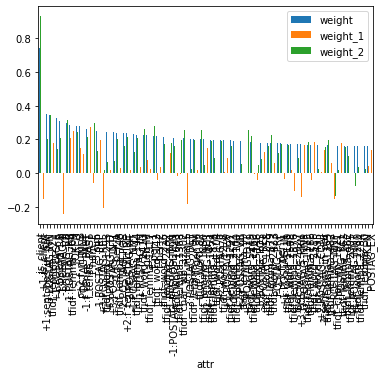

In [50]:
featules_all[:100].plot(x="attr", y=[col for col in featules_all.columns if ('weight' in col)],kind='bar')

In [38]:
my_crf_3 = model_utils.CrfClassifier(crf_model=CRF(
                max_iterations=100,
                all_possible_transitions=True))
my_crf_3.fit(dataset.get_x([1,4],'15_15'),dataset.get_y([1,4],'15_15'))
my_crf_3.predict(dataset.get_y([2,3],'15_15'))
features_3=model_utils.get_estimator_features(my_crf_3.crf_model,**dataset.tf_params)
features_3

CrfClassifier>>>>>>init() called
CrfClassifier>>>>>>>predict() called


,weight,label,attr,string
0,0.927721,is_nar,is_client,
1,0.345913,not_nar,-3:POSTAG_NN,
2,0.327825,not_nar,tfidf_word_2516,יש
3,0.312835,is_nar,POSTAG_VB,
4,0.302626,not_nar,+1.sim,
...,...,...,...,...
20369,-0.302626,is_nar,+1.sim,
20370,-0.312835,not_nar,POSTAG_VB,
20371,-0.327825,is_nar,tfidf_word_2516,יש
20372,-0.345913,is_nar,-3:POSTAG_NN,


In [39]:
featules_all = featules_all.merge(features_3[['label','attr','weight']],on=['label','attr'],suffixes=(None,"_{}".format(2)),how='outer',copy=False,validate='one_to_one')
featules_all

,weight,label,attr,string,weight_1,weight_2
0,0.740766,is_nar,is_client,,0.700640,0.927721
1,0.359704,not_nar,+1:is_client,,-0.152312,0.292619
2,0.351215,is_nar,+1:sent_pos_in_par,,-0.053314,0.202733
3,0.346278,not_nar,-3:POSTAG_NN,,-0.186565,0.345913
4,0.335047,is_nar,tfidf_lemma_221,אני,0.182208,0.270138
...,...,...,...,...,...,...
29137,NaN,not_nar,tfidf_lemma_3045,NaN,-0.131809,-0.006566
29138,NaN,not_nar,tfidf_word_1848,NaN,-0.135579,NaN
29139,NaN,not_nar,tfidf_lemma_1050,NaN,-0.141414,NaN
29140,NaN,not_nar,tfidf_lemma_1883,NaN,-0.147180,-0.096935


In [12]:
f1=pd.DataFrame(columns=['weight','label','attr','string'])


In [13]:
f2=pd.DataFrame(data={'weight':[0.1],'label':['is_nar'],'attr':['is_client'],'string':[None]})
f2                 

,weight,label,attr,string
0,0.1,is_nar,is_client,None


In [17]:
suf1=(None,"2")
suff2=("2","")

In [18]:
f3 = f1.merge(f2[['label','attr','weight']],on=['label','attr'],suffixes=suff2,how='outer',copy=False,validate='one_to_one')


In [19]:
f3

,weight2,string,label,attr,weight
0,NaN,NaN,is_nar,is_client,0.1


### Load features from CRF cross-validation

In [6]:
crf_cv_features=common_utils.load_db(dir_name,"crf.features.new.76")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/crf.features.new.76.csv,  index False


In [7]:
crf_cv_features

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight
0,5.277192,not_nar,tfidf_char_wb_850,בינ,0.873786,0.362794,0.486832,NaN,0.388250,0.131934,0.062144,0.011335,1.171824
1,4.952001,is_nar,tfidf_word_2433,יושבים,1.977210,2.147270,NaN,NaN,2.373856,2.570761,NaN,1.770088,2.403519
2,4.589588,not_nar,tfidf_word_3090,לנקות,1.016836,2.385004,1.364897,3.020085,3.008428,0.298062,2.396263,1.011753,0.444087
3,4.428958,not_nar,tfidf_char_wb_19476,יכנ,3.980455,3.515382,4.240009,0.224892,4.452783,5.410194,3.275344,3.672658,0.000003
4,4.338737,not_nar,tfidf_lemma_2260,סודר,3.775087,4.140668,2.191434,4.549525,3.497812,NaN,3.425014,3.181474,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,NaN,not_nar,tfidf_char_wb_15736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004438
11944,NaN,not_nar,tfidf_char_wb_2339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005874
11945,NaN,not_nar,tfidf_lemma_425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015457
11946,NaN,not_nar,tfidf_char_wb_27952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046208


In [13]:
w_column = [col for col in crf_cv_features.columns if ('weight' in col)]

In [23]:
my_array = pd.DataFrame(index=[0,1],columns=['A','B'])

In [28]:
my_array['A']=10
my_array.loc[0,'B']=20
my_array

,A,B
0,10,20
1,10,NaN


In [31]:
np.mean(my_array,axis=1)

0    15.0
1    10.0
dtype: float64

In [35]:
crf_cv_features['mean']=crf_cv_features[w_column].mean(axis=1)

## Add missing strings to features

In [41]:
dataset=pickle.load( open( os.path.join(os.getcwd(),
                defines.PATH_TO_DFS,
                dir_name,
                "dataset_new.76"+
                ".p"),
                 "rb"))

In [44]:
imp.reload(model_utils)
model_utils.tf_features={}
for k, v in dataset.tf_params.items():
    model_utils.tf_features[k] = v.features
crf_cv_features['string'] = crf_cv_features["attr"].transform(model_utils.get_tf_string)
crf_cv_features

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
0,5.277192,not_nar,tfidf_char_wb_850,בינ,0.873786,0.362794,0.486832,NaN,0.388250,0.131934,0.062144,0.011335,1.171824,0.974010
1,4.952001,is_nar,tfidf_word_2433,יושבים,1.977210,2.147270,NaN,NaN,2.373856,2.570761,NaN,1.770088,2.403519,2.599244
2,4.589588,not_nar,tfidf_word_3090,לנקות,1.016836,2.385004,1.364897,3.020085,3.008428,0.298062,2.396263,1.011753,0.444087,1.953500
3,4.428958,not_nar,tfidf_char_wb_19476,יכנ,3.980455,3.515382,4.240009,0.224892,4.452783,5.410194,3.275344,3.672658,0.000003,3.320068
4,4.338737,not_nar,tfidf_lemma_2260,סודר,3.775087,4.140668,2.191434,4.549525,3.497812,NaN,3.425014,3.181474,NaN,3.637469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,NaN,not_nar,tfidf_char_wb_15736,ויכו,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004438,-0.004438
11944,NaN,not_nar,tfidf_char_wb_2339,הפנ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005874,-0.005874
11945,NaN,not_nar,tfidf_lemma_425,ברירה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015457,-0.015457
11946,NaN,not_nar,tfidf_char_wb_27952,פריע,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046208,-0.046208


In [46]:
common_utils.save_db(crf_cv_features,dir_name,"crf.features.new.76")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/crf.features.new.76.csv,  index False


In [62]:
crf_cv_features.sort_values(by='mean',ascending=False)[:100]

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
6,4.049958,not_nar,tfidf_lemma_364,בישל,4.502008,4.812185,NaN,3.252814,3.639021,NaN,4.260939,3.582914,NaN,4.014263
7986,NaN,is_nar,tfidf_word_773,בקיבוץ,4.356954,3.177902,NaN,3.758851,NaN,NaN,4.511246,NaN,NaN,3.951238
7988,NaN,not_nar,tfidf_word_3428,מהעבר,3.002947,NaN,4.128957,2.057840,4.282197,4.621712,4.366971,4.388053,3.367888,3.777071
59,2.181491,is_nar,tfidf_lemma_648,הולדת,5.347836,3.027451,4.151603,4.077867,4.046792,2.775223,NaN,4.319711,2.871547,3.644391
4,4.338737,not_nar,tfidf_lemma_2260,סודר,3.775087,4.140668,2.191434,4.549525,3.497812,NaN,3.425014,3.181474,NaN,3.637469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,0.025786,not_nar,tfidf_word_2682,לאורך,1.458166,3.026794,2.588690,1.942023,1.210181,1.808052,0.422698,1.674428,3.093244,1.725006
299,0.836687,not_nar,tfidf_word_3646,ממישהו,NaN,2.402131,1.313553,NaN,NaN,1.490532,2.553734,NaN,NaN,1.719327
310,0.815994,not_nar,tfidf_lemma_446,גדל,2.464319,1.937377,1.069568,1.092401,1.903789,1.168018,1.536366,2.043291,3.141042,1.717216
70,2.067159,not_nar,tfidf_lemma_1540,כללי,1.452360,1.925273,0.092779,1.115321,2.164029,1.604212,1.852145,1.746000,3.142592,1.716187


In [1]:
crf_cv_features[crf_cv_features['is_nar']==1]

NameError: name 'crf_cv_features' is not defined

In [65]:
crf_cv_features[crf_cv_features['string'].str.contains("אני")]

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
1237,0.074292,is_nar,tfidf_lemma_221,אני,0.045259,0.074088,0.126556,0.190137,0.168061,0.157735,0.155456,0.198016,0.043302,0.123290
2294,0.008057,not_nar,tfidf_word_236,אני,-0.006515,0.018873,0.008023,0.026447,-0.004626,0.006197,0.027797,0.059873,0.019594,0.016372
2382,0.006403,not_nar,tfidf_word_4866,שאני,-0.009459,0.016736,0.005030,-0.002703,0.006667,0.011932,0.019488,0.025073,0.021669,0.010084
2471,0.005244,is_nar,tfidf_word_1887,ואני,0.006595,0.071961,0.004490,0.096964,0.109708,0.019985,0.011793,0.186958,0.005592,0.051929
2638,0.003524,not_nar,tfidf_char_wb_9345,אני,-0.000799,0.003345,0.002764,0.005013,-0.004182,0.003286,-0.000513,0.023574,0.004178,0.004019
2645,0.003491,not_nar,tfidf_char_wb_9344,אני,-0.000753,-0.002267,0.002729,0.004920,-0.003781,0.003211,-0.000440,0.023511,0.004139,0.003476
2707,0.003051,is_nar,tfidf_word_2642,כשאני,0.047711,0.006332,0.053601,-0.000024,0.073097,0.263327,0.083353,0.081680,0.002340,0.061447
2772,0.002635,not_nar,tfidf_char_wb_348,אני,-0.003440,0.001074,0.002546,0.008221,-0.003699,-0.000079,0.009089,0.020556,0.005725,0.004263
2773,0.002618,not_nar,tfidf_char_wb_347,אני,-0.003408,0.000891,0.002541,0.008256,-0.003463,-0.000161,0.009062,0.020519,0.005676,0.004253
2843,0.002255,not_nar,tfidf_char_wb_7382,שאני,-0.001153,0.007489,0.001691,-0.000157,-0.000360,0.003986,0.005958,0.007196,0.007142,0.003405


In [48]:
common_crf_features=crf_cv_features[~crf_cv_features.isnull().any(axis=1)]
common_crf_features

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
2,4.589588,not_nar,tfidf_word_3090,לנקות,1.016836,2.385004,1.364897,3.020085,3.008428,0.298062,2.396263,1.011753,0.444087,1.953500
3,4.428958,not_nar,tfidf_char_wb_19476,יכנ,3.980455,3.515382,4.240009,0.224892,4.452783,5.410194,3.275344,3.672658,0.000003,3.320068
9,3.653440,not_nar,tfidf_lemma_383,במקום,3.931721,3.487616,3.990134,3.149173,3.258662,2.869554,3.721147,3.413970,2.659896,3.413531
11,3.536350,is_nar,tfidf_lemma_1423,יישב,1.758559,2.264159,1.502915,2.724207,2.887811,1.932483,2.626771,3.472709,3.300559,2.600652
12,3.522010,not_nar,tfidf_word_3168,לצחוק,1.891774,2.803900,3.858969,3.724681,2.775803,2.603385,1.676019,2.768400,3.871469,2.949641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7974,-2.320878,not_nar,tfidf_lemma_1285,חש,-2.218823,-2.632206,-0.439413,-0.292126,-0.014173,-0.118626,-0.017824,-0.057083,-2.122647,-1.023380
7975,-2.338928,not_nar,tfidf_word_4301,סיפור,-2.634415,-2.639944,-1.645373,-1.736079,-3.160137,-2.173461,-2.384897,-2.425341,-2.339666,-2.347824
7977,-2.383520,not_nar,tfidf_char_wb_25488,ניה,-0.666001,-0.971517,-0.958351,-0.868012,-0.586721,-0.845996,-0.426619,-0.429386,-0.724585,-0.886071
7981,-2.836742,not_nar,tfidf_char_wb_30927,שיר,-2.102295,-2.323993,-1.551656,-1.290093,-2.654074,-2.601914,-2.226168,-1.630163,-1.681705,-2.089880


In [58]:
common_crf_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955 entries, 2 to 7982
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weight_1  3955 non-null   float64
 1   label     3955 non-null   object 
 2   attr      3955 non-null   object 
 3   string    3955 non-null   object 
 4   weight_2  3955 non-null   float64
 5   weight_3  3955 non-null   float64
 6   weight_4  3955 non-null   float64
 7   weight_5  3955 non-null   float64
 8   weight_6  3955 non-null   float64
 9   weight_7  3955 non-null   float64
 10  weight_8  3955 non-null   float64
 11  weight_9  3955 non-null   float64
 12  weight    3955 non-null   float64
 13  mean      3955 non-null   float64
dtypes: float64(11), object(3)
memory usage: 463.5+ KB


In [60]:
common_crf_features[common_crf_features["label"] == "is_nar"].sort_values(by='mean',ascending=False)

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
46,2.357974,is_nar,tfidf_lemma_366,בכה,2.820254,2.069292,2.641229,2.539399,2.594014,3.204775,1.942401,2.982837,3.984001,2.713618
73,2.028683,is_nar,tfidf_lemma_3155,תל,2.592997,2.279540,2.089853,3.229095,2.660360,3.616663,2.635474,3.075182,2.524642,2.673249
11,3.536350,is_nar,tfidf_lemma_1423,יישב,1.758559,2.264159,1.502915,2.724207,2.887811,1.932483,2.626771,3.472709,3.300559,2.600652
29,2.743915,is_nar,tfidf_char_wb_28069,פתי,2.130129,2.199627,1.562644,2.377998,2.202714,4.464617,1.731812,1.937565,2.359163,2.371018
83,1.955597,is_nar,tfidf_lemma_1280,חרדי,2.433474,2.540920,2.499855,1.810790,2.481945,2.256994,2.283493,1.624845,1.988562,2.187647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,-1.186642,is_nar,tfidf_char_wb_2670,ו,-0.946917,-0.633815,-0.840427,-0.949174,-0.883921,-0.891036,-0.778235,-0.806373,-0.700600,-0.861714
7927,-1.153412,is_nar,tfidf_word_812,בשביל,-0.699942,-0.964182,-0.896178,-1.285043,-1.062794,-1.165837,-0.901554,-0.588320,-1.214968,-0.993223
7948,-1.355233,is_nar,tfidf_lemma_1539,כלל,-1.098887,-0.937528,-0.946752,-1.139076,-1.309992,-0.824218,-1.096991,-0.937184,-0.749585,-1.039545
7953,-1.477783,is_nar,tfidf_char_wb_7336,ש,-0.222835,-1.313684,-0.866572,-1.353864,-0.866780,-1.219697,-1.161716,-1.083857,-1.101103,-1.066789


In [61]:
common_crf_features[common_crf_features["label"] == "is_nar"].sort_values(by='mean')

,weight_1,label,attr,string,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight,mean
7961,-1.672782,is_nar,tfidf_char_wb_8866,אות,-0.852832,-1.805877,-0.519072,-0.825790,-1.897384,-0.566886,-0.702681,-0.653658,-1.266862,-1.076382
7953,-1.477783,is_nar,tfidf_char_wb_7336,ש,-0.222835,-1.313684,-0.866572,-1.353864,-0.866780,-1.219697,-1.161716,-1.083857,-1.101103,-1.066789
7948,-1.355233,is_nar,tfidf_lemma_1539,כלל,-1.098887,-0.937528,-0.946752,-1.139076,-1.309992,-0.824218,-1.096991,-0.937184,-0.749585,-1.039545
7927,-1.153412,is_nar,tfidf_word_812,בשביל,-0.699942,-0.964182,-0.896178,-1.285043,-1.062794,-1.165837,-0.901554,-0.588320,-1.214968,-0.993223
7929,-1.186642,is_nar,tfidf_char_wb_2670,ו,-0.946917,-0.633815,-0.840427,-0.949174,-0.883921,-0.891036,-0.778235,-0.806373,-0.700600,-0.861714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.955597,is_nar,tfidf_lemma_1280,חרדי,2.433474,2.540920,2.499855,1.810790,2.481945,2.256994,2.283493,1.624845,1.988562,2.187647
29,2.743915,is_nar,tfidf_char_wb_28069,פתי,2.130129,2.199627,1.562644,2.377998,2.202714,4.464617,1.731812,1.937565,2.359163,2.371018
11,3.536350,is_nar,tfidf_lemma_1423,יישב,1.758559,2.264159,1.502915,2.724207,2.887811,1.932483,2.626771,3.472709,3.300559,2.600652
73,2.028683,is_nar,tfidf_lemma_3155,תל,2.592997,2.279540,2.089853,3.229095,2.660360,3.616663,2.635474,3.075182,2.524642,2.673249
